In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_path = '../raw_data/'
df = pd.read_excel(data_path + 'HCP Dataset for Case Study.xlsx')

## Background Research
- HCP (Hospotical Casemix Protocol) 
    - standardised format of recording hospital episode data
    - provides demographical, financial and clinical information 
    - casemix funding - hospitals funded based on type and complexity of the cases that they treat, rather than a fixed flat rate.
    - hospitals provide to health insurers
    - health insurers provide to Department of Health, Disability and Ageing

- episode
    - period between admission and separation (formal or statistical) that a person spends in the hospital
    - formal: administrative process used by hospital to to record the commencement/end of undertaking, treating, or caring of a patient
    - statistical: administrative process used by hospital to to record the commencement/end of a new episode (typically by another department or institution, or when a different type of care is required)
    - essential date and time
    - Great resource with examples in ../resources/info-sheet-adm-sep-v1.0.pdf


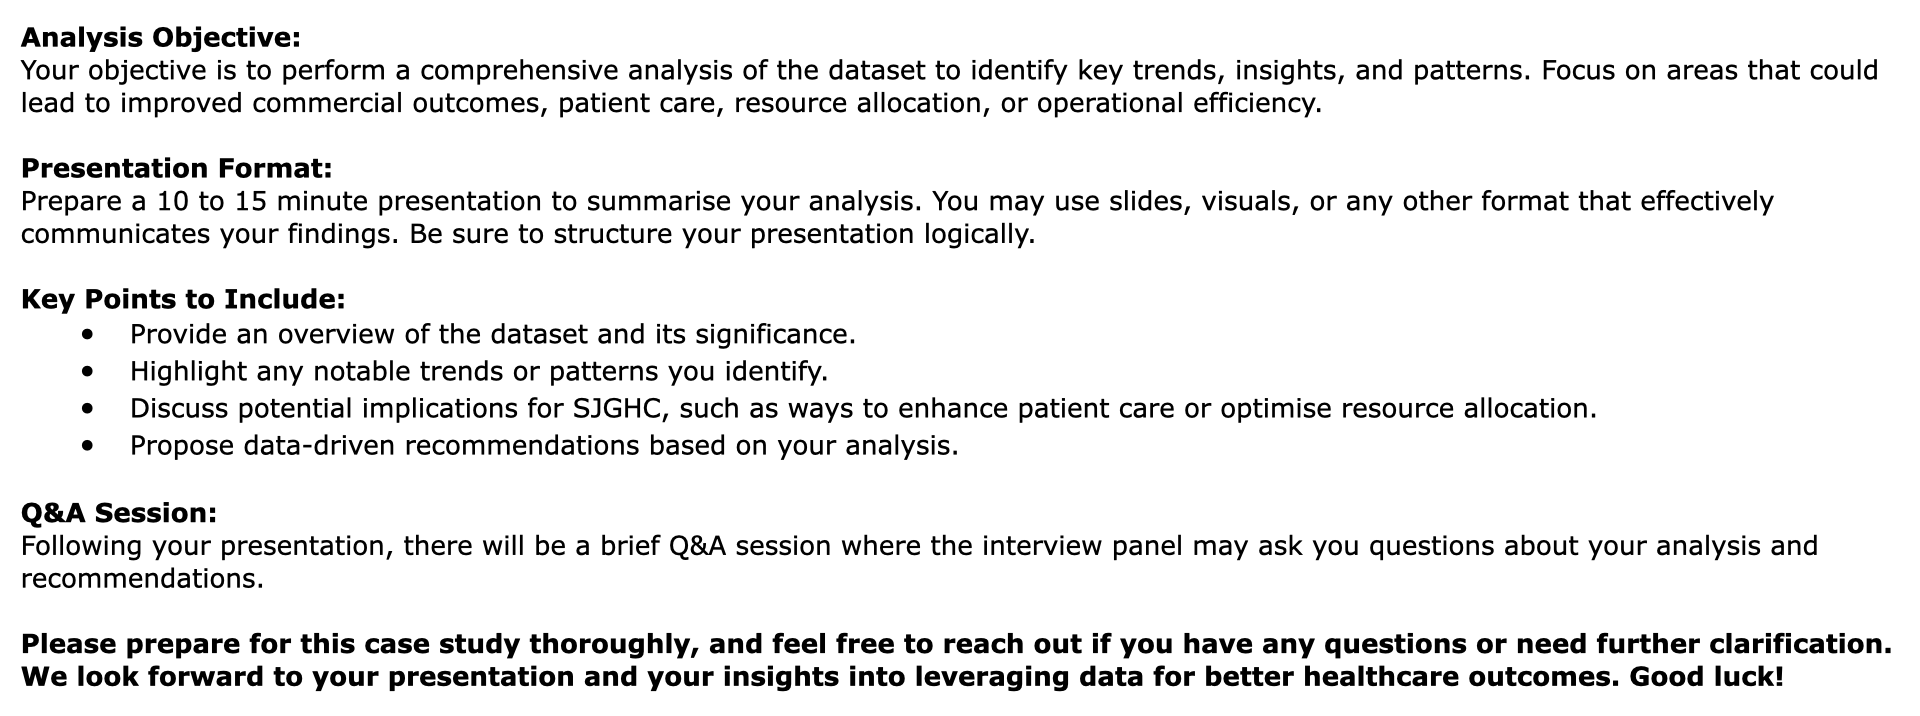

## Initial Questions

- Can we determine which features are linked with readmissions within 28 days -> improvements within these areas could decrease readmissions; an indication of quality care and avoids Avoidable Hospital Readmissions (ADR)

- Can the complexity of the episode be measured as an interpretable index -> can predict overall funding from department based on collective measurement involving this index; 

- Can the funding be predicted using the HCP data, and which features contributes the most to this funding. We can simulate many "what-if" scenarios. e.g If we find more older patients are being administered, can we predict how much funding we would receive from their episodes and based on that, we can pivot into ways we can accomodate for this increase.

- Which time periods across the 22/23 year experience the highest influx of admissions E.g more rostered staff, ensuring enough allocatable rooms/beds. 

- What are the demographics of our main patients and which diagnoses and procedures are linked most with them. 

- What are the average episode durations for each principle diagnosis? Can we figure out why some take a long time?

- What is the probability of requiring additional diagnoses and procedures based on other features, such as principal diagnosis, age, admission date/time


In [106]:
df.head()

,InsurerIdentifier,EpisodeIdentifier,DateOfBirth,Postcode,Sex,AdmissionDate,SeparationDate,HospitalType,ICU_Days,ICU_Hours,...,BundledCharges,HIH_Charges,SCN_Charges,CCU_Charges,SCN_Hours,CCU_Hours,SCN_Days,CCU_Days,QualifiedDaysNewborns,PalliativeCareDays
0,INS1,1624122,1012000,6280,1,1012023,2012023,2,0,0,...,316700,0,0,0,0,0,0,0,0,0
1,INS5,1624177,1011937,6233,2,1012023,6012023,2,0,0,...,696100,0,0,0,0,0,0,0,0,0
2,INS9,1624113,1011968,6225,2,1012023,9012023,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,,1624005,1011955,6281,1,1022023,1022023,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,,1625135,1011963,6230,1,1022023,1022023,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df[df['Readmission28Days'] != 8]

# Due to limited distribution of readmissions, it is not feasible to perform any analysis on or involving readmissions, including predicting readmissisons through predictive discriminative models.

,InsurerIdentifier,EpisodeIdentifier,DateOfBirth,Postcode,Sex,AdmissionDate,SeparationDate,HospitalType,ICU_Days,ICU_Hours,...,BundledCharges,HIH_Charges,SCN_Charges,CCU_Charges,SCN_Hours,CCU_Hours,SCN_Days,CCU_Days,QualifiedDaysNewborns,PalliativeCareDays
17385,INS4,1649233,1011984,6233,2,18032023,19032023,2,0,0,...,0,0,0,0,0,0,0,0,0,0
23842,INS6,1637884,1012023,6230,2,24042023,27042023,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df[[c for c in df.columns if 'charges' in c.lower()]].describe()

,OtherCharges,BundledCharges,HIH_Charges,SCN_Charges,CCU_Charges
count,3.061500e+04,3.061500e+04,30615.000000,30615.000000,3.061500e+04
mean,4.301548e+02,1.672184e+05,7.172954,9.312429,3.097694e+02
std,1.040664e+04,3.168073e+05,782.648622,1180.205679,1.506497e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
75%,0.000000e+00,1.992000e+05,0.000000,0.000000,0.000000e+00
max,1.079500e+06,5.707700e+06,109800.000000,174200.000000,1.481400e+06


In [109]:
# diagnoses codes
df[[c for c in df.columns if 'diagnosis' in c.lower() or 'diag' in c.lower()]].value_counts().reset_index()


,PrincipalDiagnosis,AdditionalDiagnosis1,AdditionalDiagnosis2,AdditionalDiagnosis3,AdditionalDiagnosis4,AdditionalDiagnosis5,AdditionalDiagnosis6,AdditionalDiagnosis7,AdditionalDiagnosis8,AdditionalDiagnosis9,...,AdditionalDiagnosis41,AdditionalDiagnosis42,AdditionalDiagnosis43,AdditionalDiagnosis44,AdditionalDiagnosis45,AdditionalDiagnosis46,AdditionalDiagnosis47,AdditionalDiagnosis48,AdditionalDiagnosis49,count
0,2Z491,,,,,,,,,,...,,,,,,,,,,9144
1,2H269,,,,,,,,,,...,,,,,,,,,,323
2,2Z511,2C9000,,,,,,,,,...,,,,,,,,,,279
3,2Z511,2C509,,,,,,,,,...,,,,,,,,,,263
4,2Z380,,,,,,,,,,...,,,,,,,,,,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10959,2K20,,,,,,,,,,...,,,,,,,,,,1
10960,2K20,2K222,2K449,2Z8643,2U073,,,,,,...,,,,,,,,,,1
10961,2K20,2K2950,2Z720,2U781,,,,,,,...,,,,,,,,,,1
10962,2K20,2K2960,2K449,2Z980,2Z8643,2U073,2U793,2U823,,,...,,,,,,,,,,1


In [110]:
df[df['PrincipalDiagnosis'].str.strip() == '2Z491'].head()

,InsurerIdentifier,EpisodeIdentifier,DateOfBirth,Postcode,Sex,AdmissionDate,SeparationDate,HospitalType,ICU_Days,ICU_Hours,...,BundledCharges,HIH_Charges,SCN_Charges,CCU_Charges,SCN_Hours,CCU_Hours,SCN_Days,CCU_Days,QualifiedDaysNewborns,PalliativeCareDays
7,,1628222,1011939,6230,1,1022023,1022023,2,0,0,...,0,0,0,0,0,0,0,0,0,0
8,,1628226,1011959,6236,1,1022023,1022023,2,0,0,...,0,0,0,0,0,0,0,0,0,0
9,,1628229,1011965,6220,1,1022023,1022023,2,0,0,...,0,0,0,0,0,0,0,0,0,0
10,,1628233,1011953,6225,2,1022023,1022023,2,0,0,...,0,0,0,0,0,0,0,0,0,0
11,,1628237,1011953,6233,2,1022023,1022023,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df_times = df.loc[:,['AdmissionDate','AdmissionTime']]
df_times['AdmissionDate'] = df_times['AdmissionDate'].astype(str).str.zfill(8)
df_times['AdmissionDate'] = pd.to_datetime(df_times['AdmissionDate'], format='%d%m%Y')
df_times

,AdmissionDate,AdmissionTime
0,2023-01-01,850
1,2023-01-01,1330
2,2023-01-01,1155
3,2023-02-01,1037
4,2023-02-01,1307
...,...,...
30610,2022-12-31,1500
30611,2022-12-31,1630
30612,2022-12-31,1325
30613,2022-12-31,1140


In [112]:
df_times['AdmissionDate'].describe()

count                            30615
mean     2022-12-31 18:35:04.615384832
min                2022-04-14 00:00:00
25%                2022-10-04 00:00:00
50%                2023-01-03 00:00:00
75%                2023-04-03 00:00:00
max                2023-06-30 00:00:00
Name: AdmissionDate, dtype: object

In [113]:
df.loc[df['PrincipalDiagnosis'] == '2Z491 ', :].sample(5)

,InsurerIdentifier,EpisodeIdentifier,DateOfBirth,Postcode,Sex,AdmissionDate,SeparationDate,HospitalType,ICU_Days,ICU_Hours,...,BundledCharges,HIH_Charges,SCN_Charges,CCU_Charges,SCN_Hours,CCU_Hours,SCN_Days,CCU_Days,QualifiedDaysNewborns,PalliativeCareDays
6746,,1619383,1011959,6225,1,7122022,7122022,2,0,0,...,0,0,0,0,0,0,0,0,0,0
23131,,1606548,1011944,6230,1,23092022,23092022,2,0,0,...,0,0,0,0,0,0,0,0,0,0
29776,INS8,1602707,1011947,6232,2,30082022,30082022,2,0,0,...,0,0,0,0,0,0,0,0,0,0
21026,,1612165,1011949,6280,2,21102022,21102022,2,0,0,...,0,0,0,0,0,0,0,0,0,0
17218,,1625217,1011972,6230,2,18012023,18012023,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(df[col].value_counts(normalize=True).head(10))
    print('\n')

InsurerIdentifier
         0.467875
INS1     0.329512
INS5     0.074310
INS2     0.042038
INS4     0.023518
INS8     0.016136
INS10    0.011465
INS6     0.011400
INS3     0.009505
INS9     0.007447
Name: proportion, dtype: float64


DRG
L61Z    0.299951
R63Z    0.223126
C16Z    0.038935
I04B    0.016920
F42B    0.015809
Z40Z    0.013882
L41Z    0.013000
D40Z    0.012118
I16Z    0.010877
P68D    0.008362
Name: proportion, dtype: float64


DRG_Version
    1.0
Name: proportion, dtype: float64


TransferInProviderNumber
            0.923828
0071120B    0.063498
0070170A    0.005292
0070150F    0.005226
0070490H    0.000425
0012310X    0.000359
0071110F    0.000294
0071610H    0.000229
0070350X    0.000229
0070090A    0.000163
Name: proportion, dtype: float64


DischargeIntention
9    0.878066
     0.095019
1    0.026490
2    0.000425
Name: proportion, dtype: float64


TransferOutProviderNumber
            0.982296
0071120B    0.011400
0070150F    0.001470
0071610H    0.001307
0070170A    0

In [115]:
df['ICU_Days'].value_counts(normalize=True).head(10)

ICU_Days
0    1.0
Name: proportion, dtype: float64

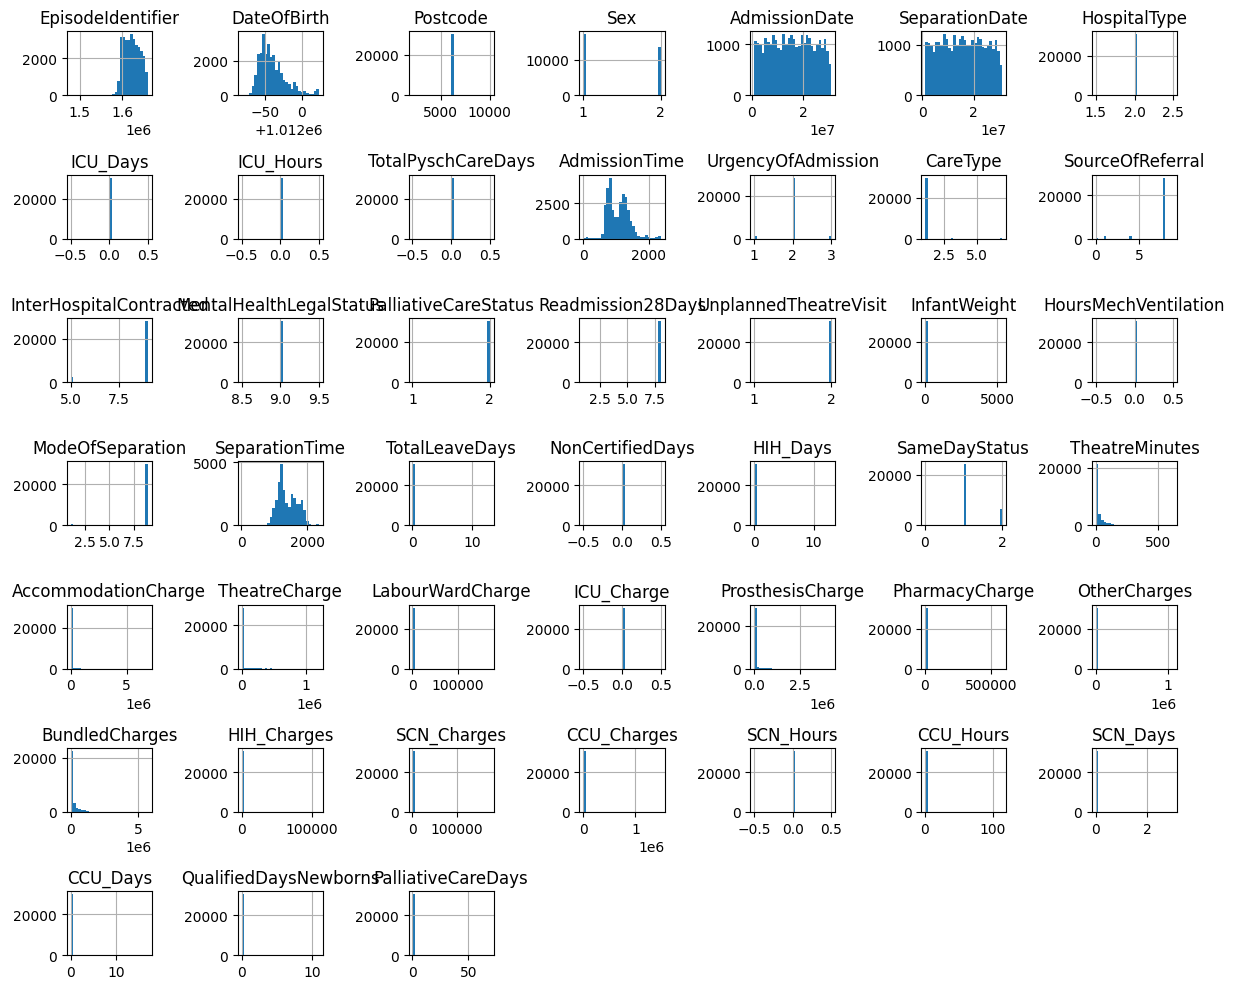

In [116]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()
# from the data, we can see that the most interesting numerical variables are:
# - EpisodeIdentifier
# - DateOfBirth
# - Sex
# - AdmissionDate
# - SeparationDate
# - AdmissionTime
# - SeparationTime
# - TheatreMinutes
# - BundledCharges
# - TheatreCharges
# - AccommodationCharge

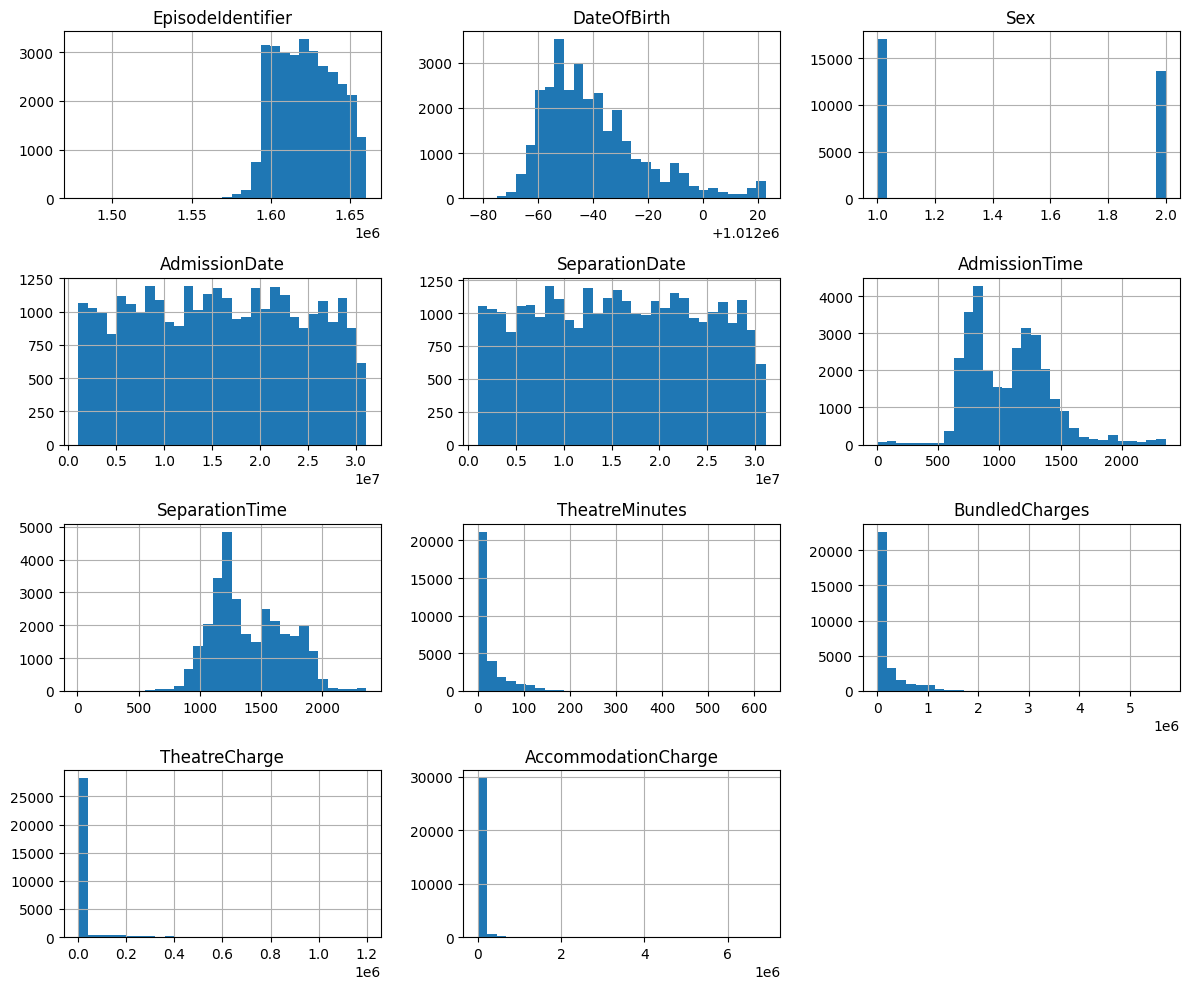

In [117]:
interest = [
    "EpisodeIdentifier",
    "DateOfBirth",
    "Sex",
    "AdmissionDate",
    "SeparationDate",
    "AdmissionTime",
    "SeparationTime",
    "TheatreMinutes",
    "BundledCharges",
    "TheatreCharge",
    "AccommodationCharge"
]
df[interest].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

In [118]:
# get distribution of columns with charge in name
for col in df.columns:
    if 'charge' in col.lower() and df[col].dtype in [np.float64, np.int64]:
        x = df.loc[df[col].astype(float)>0, :]
        print(x[col].describe())
        print("\n")

count    1.910000e+04
mean     7.149128e+04
std      1.869326e+05
min      8.000000e+03
25%      3.570900e+04
50%      3.571000e+04
75%      4.799400e+04
max      6.913800e+06
Name: AccommodationCharge, dtype: float64


count    2.403000e+03
mean     2.147660e+05
std      1.522897e+05
min      2.120000e+04
25%      1.005000e+05
50%      1.831700e+05
75%      2.968000e+05
max      1.198700e+06
Name: TheatreCharge, dtype: float64


count        17.000000
mean     169258.823529
std        2318.420482
min      164400.000000
25%      170300.000000
50%      170300.000000
75%      170300.000000
max      170300.000000
Name: LabourWardCharge, dtype: float64


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ICU_Charge, dtype: float64


count    5.494000e+03
mean     2.168526e+05
std      3.163244e+05
min      8.000000e+02
25%      2.500000e+04
50%      6.440000e+04
75%      2.492750e+05
max      4.260700e+06
Name: ProsthesisCharge, dt

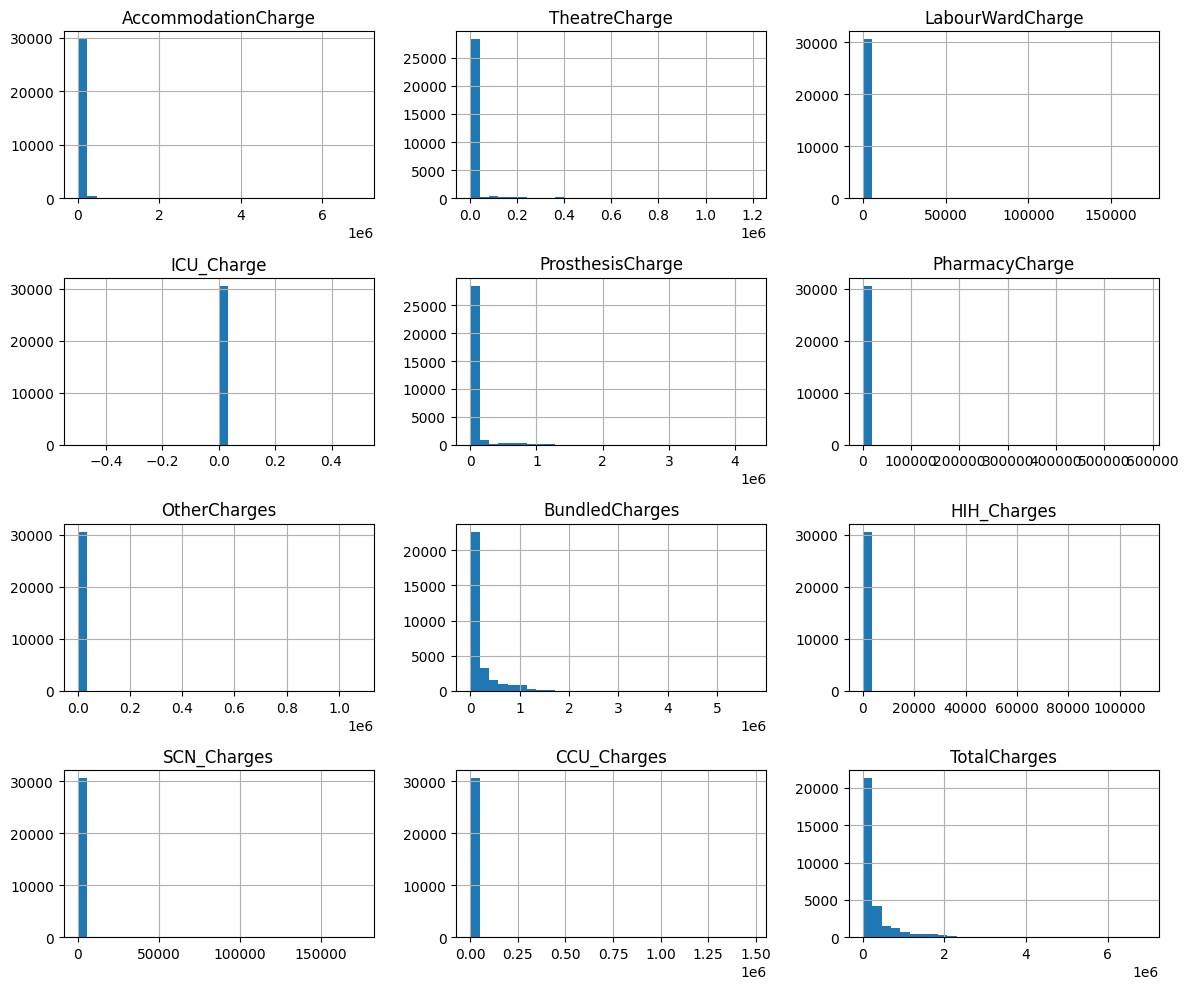

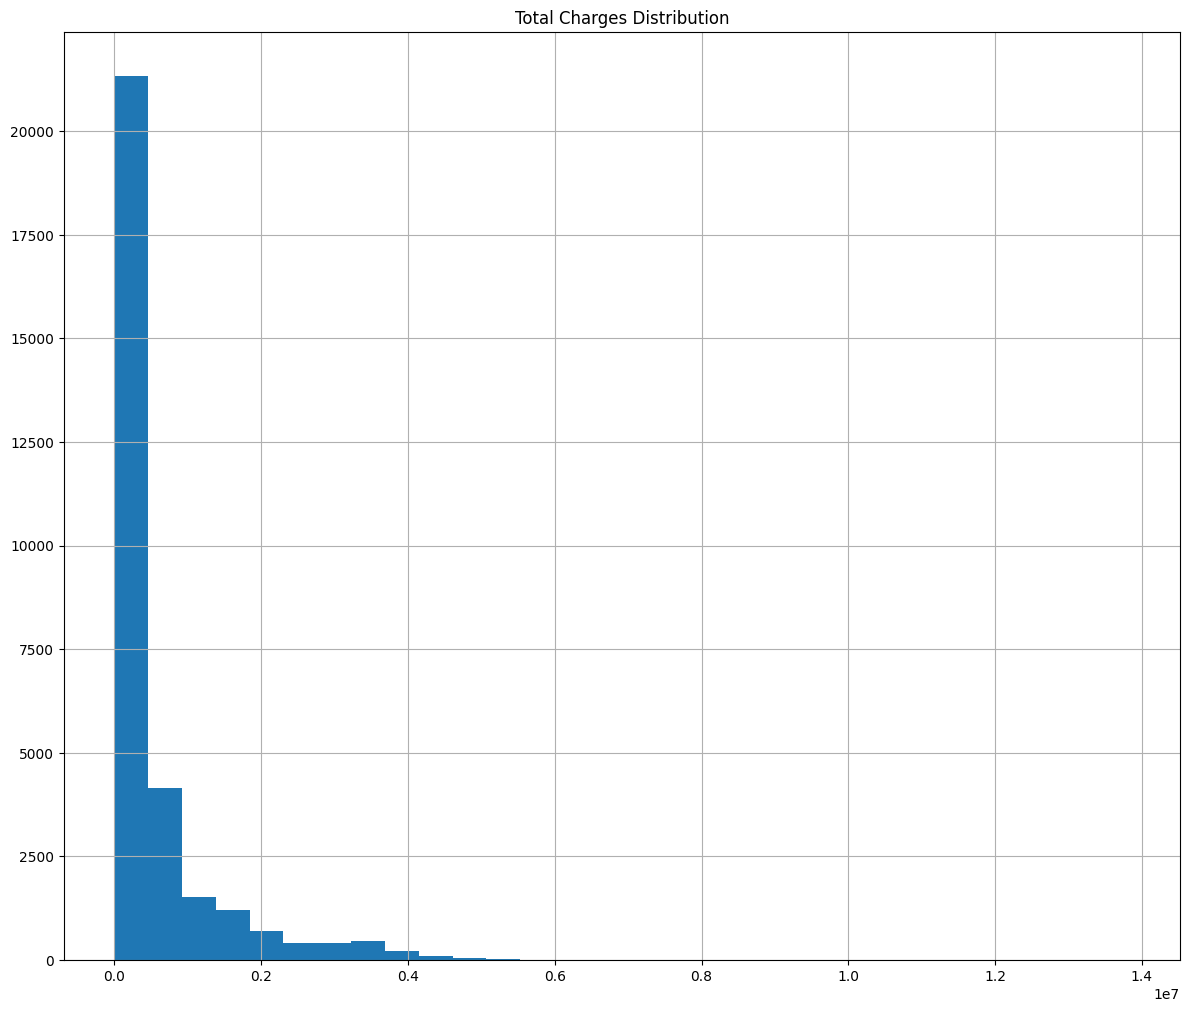

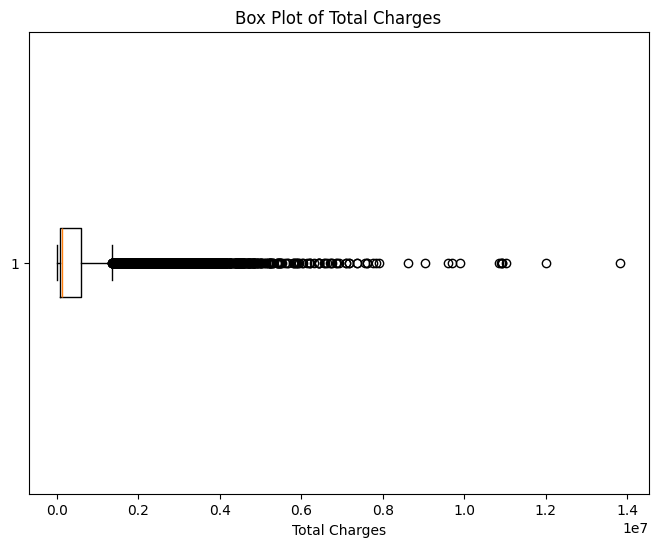

In [126]:
interest = [
    col for col in df.columns if 'charge' in col.lower() and df[col].dtype in [np.float64, np.int64]
]
df[interest].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()
# charges dont look very well distributed so very unlikely to provide any meaningful insights. 

# try combining charges into a single column
df['TotalCharges'] = df[interest].sum(axis=1)
df['TotalCharges'].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.title('Total Charges Distribution')
plt.show()

# box plot to see distribution
plt.figure(figsize=(8, 6))
plt.boxplot(df['TotalCharges'], vert=False)
plt.title('Box Plot of Total Charges')
plt.xlabel('Total Charges')
plt.show()

In [120]:
df['DischargeIntention'].value_counts(normalize=True)

DischargeIntention
9    0.878066
     0.095019
1    0.026490
2    0.000425
Name: proportion, dtype: float64

In [121]:
df['UnplannedTheatreVisit'].value_counts(normalize=True)

UnplannedTheatreVisit
2    0.999935
1    0.000065
Name: proportion, dtype: float64

In [122]:
df['EpisodeIdentifier'].nunique(), df.shape[0]

(30615, 30615)

In [123]:
df.groupby('PrincipalDiagnosis')[[col for col in df.columns if 'charge' in col.lower() and df[col].dtype in [np.float64, np.int64]]].mean().reset_index()

,PrincipalDiagnosis,AccommodationCharge,TheatreCharge,LabourWardCharge,ICU_Charge,ProsthesisCharge,PharmacyCharge,OtherCharges,BundledCharges,HIH_Charges,SCN_Charges,CCU_Charges,TotalCharges
0,200000000000000010732324408786944,319500.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,319500.000000
1,200000000000000001240017290081556638990336,6800.000000,0.000000,0.0,0.0,5566.666667,0.000000,0.000000,733633.333333,0.0,0.0,0.000000,746000.000000
2,2000000000000000089771425356151833571098624,72927.272727,171500.000000,0.0,0.0,16127.272727,0.000000,29698.272727,251763.636364,0.0,0.0,36363.636364,578380.090909
3,1999999999999999986441897348723255952923416883...,135050.000000,247500.000000,0.0,0.0,4400.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,386950.000000
4,2000000000000000115715919885453939654786757378...,0.000000,0.000000,0.0,0.0,9200.000000,0.000000,0.000000,640900.000000,0.0,0.0,0.000000,650100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2Z491,35697.806729,8.983014,0.0,0.0,0.783972,0.000000,0.000000,51.611498,0.0,0.0,0.000000,35759.185213
1517,2Z511,26943.739862,0.000000,0.0,0.0,381.818182,120.597277,0.000000,26321.373152,0.0,0.0,0.000000,53767.528473
1518,2Z514,0.000000,0.000000,0.0,0.0,168800.000000,0.000000,0.000000,297900.000000,0.0,0.0,0.000000,466700.000000
1519,2Z7511,657714.285714,0.000000,0.0,0.0,0.000000,0.000000,0.000000,32000.000000,0.0,0.0,0.000000,689714.285714


In [124]:
df[df['PrincipalDiagnosis']==200000000000000010732324408786944]

,InsurerIdentifier,EpisodeIdentifier,DateOfBirth,Postcode,Sex,AdmissionDate,SeparationDate,HospitalType,ICU_Days,ICU_Hours,...,HIH_Charges,SCN_Charges,CCU_Charges,SCN_Hours,CCU_Hours,SCN_Days,CCU_Days,QualifiedDaysNewborns,PalliativeCareDays,TotalCharges
10872,,1626223,1011945,6290,1,12012023,15012023,2,0,0,...,0,0,0,0,0,0,0,0,0,319500


In [125]:
# get the correlation between principal diagnosis and 